In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure default plot style
sns.set(style="whitegrid")
%matplotlib inline


# Exploratory Data Analysis (EDA) Notebook

In [3]:
# Load the Excel file (update the file path as needed)
file_path = "1. DeepDeauville_2015-2025 à jour.xlsx"
df = pd.read_excel(file_path)

# Display the first 5 rows to inspect the data
df.head()


,SubjectCode,N°Dossier,PID,Nom Patient,Sexe,Date Nais.,Age Exam,Réf.Ext.,Date Examen,Hopital,...,Comment,Line of treatment,Lesion SUVmax,Liver SUVmax,Bloodpool SUVmax,Deauville score,Lesion localisation,Manual segmentation time,ROI version,Comment PET
0,DeepDeauville 1138,6133936,406133936,ABTAL SAID,H,1965-03-30,59,NaN,2024-08-19,Institut Bordet,...,NaN,1.0,3.27,2.59,1.77,3.0,46.0,12.0,1.0,NaN
1,DeepDeauville 0899,6133936,406133936,ABTAL SAID,H,1965-03-30,59,NaN,2024-10-07,Institut Bordet,...,NaN,1.0,7.40,2.34,1.70,5.0,18.0,17.0,1.0,NaN
2,DeepDeauville 1111,1421103,401421103,ADOLPHE YANNECK,H,1976-06-25,47,NaN,2023-08-28,Institut Bordet,...,NaN,1.0,0.00,3.39,2.17,1.0,51.0,15.0,1.0,NaN
3,DeepDeauville 0942,1421103,401421103,ADOLPHE YANNECK,H,1976-06-25,48,NaN,2024-07-05,Institut Bordet,...,NaN,2.0,0.00,3.22,2.28,1.0,51.0,16.0,1.0,NaN
4,DeepDeauville 1867,1421103,401421103,ADOLPHE YANNECK,H,1976-06-25,48,NaN,2024-09-27,Institut Bordet,...,NaN,2.0,0.00,3.16,2.59,1.0,51.0,15.0,1.0,NaN


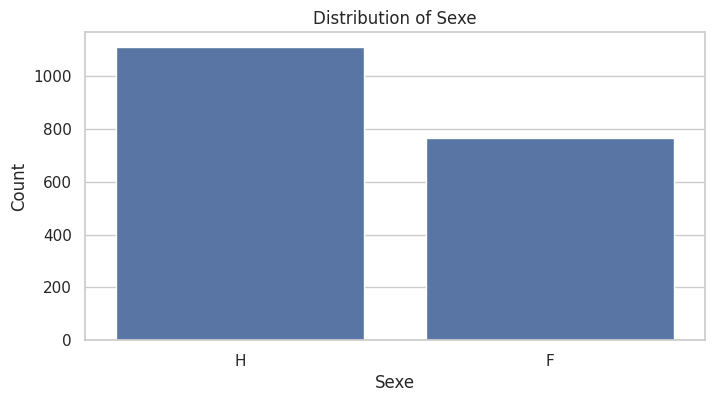

Sexe
H    59.168443
F    40.831557
Name: proportion, dtype: float64


In [4]:
# Count plot for 'Sexe'
plt.figure(figsize=(8, 4))
sns.countplot(x='Sexe', data=df)
plt.title("Distribution of Sexe")
plt.xlabel("Sexe")
plt.ylabel("Count")
plt.show()

# Print percentage distribution for 'Sexe'
sexe_dist = df['Sexe'].value_counts(normalize=True) * 100
print(sexe_dist)


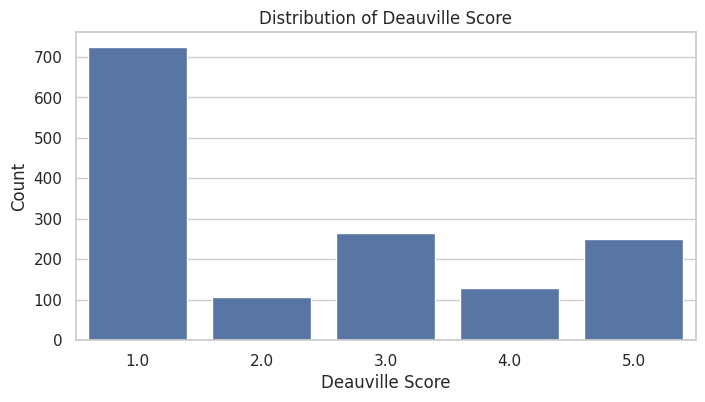

Deauville Score distribution (in %):
Deauville score 
1.0    49.119241
3.0    17.953930
5.0    17.005420
4.0     8.672087
2.0     7.249322
Name: proportion, dtype: float64


In [5]:
# Count plot for 'Deauville score'
plt.figure(figsize=(8, 4))
sns.countplot(x='Deauville score ', data=df)
plt.title("Distribution of Deauville Score")
plt.xlabel("Deauville Score")
plt.ylabel("Count")
plt.show()

# Print percentage distribution for 'Deauville score'
deauville_dist = df['Deauville score '].value_counts(normalize=True) * 100
print("Deauville Score distribution (in %):")
print(deauville_dist)


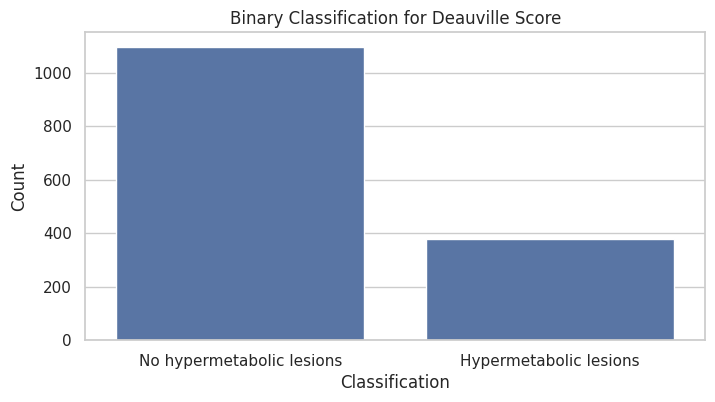

Binary Classification (Deauville Score) Counts:
Deauville_binary
No hypermetabolic lesions    1097
Hypermetabolic lesions        379
Name: count, dtype: int64

Binary Classification (Deauville Score) Percentages:
Deauville_binary
No hypermetabolic lesions    74.322493
Hypermetabolic lesions       25.677507
Name: proportion, dtype: float64


In [6]:

# 2. Drop rows with missing Deauville score
df = df.dropna(subset=['Deauville score '])


# Now you can safely apply your binary classification logic
def classify_deauville(score):
    try:
        s = float(score)
    except:
        return None  # or handle it differently if needed

    if 1 <= s <= 3:
        return "No hypermetabolic lesions"
    elif 4 <= s <= 5:
        return "Hypermetabolic lesions"

df['Deauville_binary'] = df['Deauville score '].apply(classify_deauville)


# Plot the binary classification distribution
plt.figure(figsize=(8, 4))
# Optionally, specify the order of categories
sns.countplot(x='Deauville_binary', data=df, order=["No hypermetabolic lesions", "Hypermetabolic lesions"])
plt.title("Binary Classification for Deauville Score")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

# Print the counts and percentage distribution for the binary classification
binary_counts = df['Deauville_binary'].value_counts()
binary_perc = df['Deauville_binary'].value_counts(normalize=True) * 100
print("Binary Classification (Deauville Score) Counts:")
print(binary_counts)
print("\nBinary Classification (Deauville Score) Percentages:")
print(binary_perc)


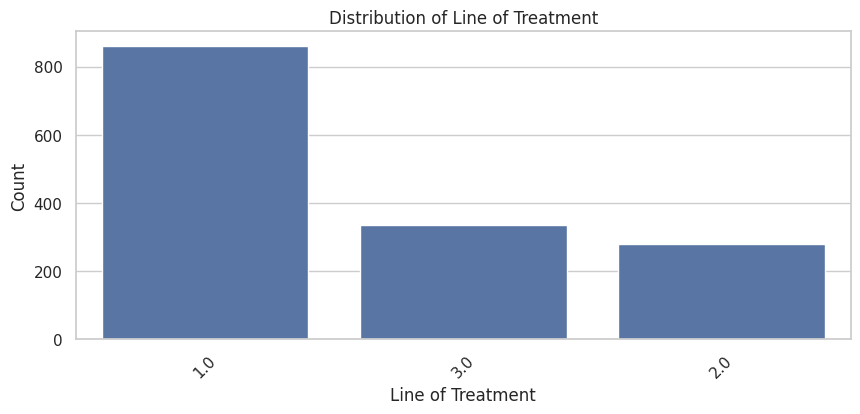

Line of Treatment distribution (in %):
Line of treatment 
1.0    58.265583
3.0    22.696477
2.0    19.037940
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(10, 4))
# Order the categories by frequency
order_treat = df['Line of treatment '].value_counts().index
sns.countplot(x='Line of treatment ', data=df, order=order_treat)
plt.title("Distribution of Line of Treatment")
plt.xlabel("Line of Treatment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print percentage distribution for 'Line of treatment'
treatment_dist = df['Line of treatment '].value_counts(normalize=True) * 100
print("Line of Treatment distribution (in %):")
print(treatment_dist)


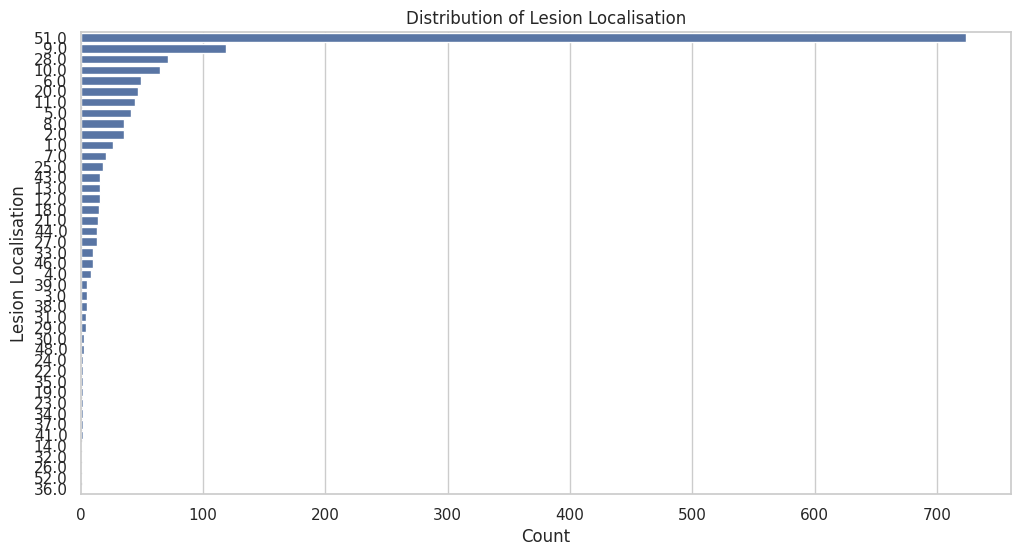

Lesion Localisation distribution (in %):
Lesion localisation
51.0    49.051491
9.0      8.062331
28.0     4.810298
10.0     4.403794
6.0      3.319783
20.0     3.184282
11.0     2.981030
5.0      2.777778
8.0      2.371274
2.0      2.371274
1.0      1.761518
7.0      1.422764
25.0     1.219512
43.0     1.084011
13.0     1.084011
12.0     1.084011
18.0     1.016260
21.0     0.948509
44.0     0.880759
27.0     0.880759
33.0     0.677507
46.0     0.677507
4.0      0.542005
39.0     0.338753
3.0      0.338753
38.0     0.338753
31.0     0.271003
29.0     0.271003
30.0     0.203252
48.0     0.203252
24.0     0.135501
22.0     0.135501
35.0     0.135501
19.0     0.135501
23.0     0.135501
34.0     0.135501
37.0     0.135501
41.0     0.135501
14.0     0.067751
32.0     0.067751
26.0     0.067751
52.0     0.067751
36.0     0.067751
Name: proportion, dtype: float64

Missing value(s) in Lesion localisation (expected 1 to 51):
{40, 42, 45, 15, 16, 17, 47, 49, 50}


In [8]:
# Ensure that 'Lesion localisation' is numeric (if not, it will be converted)
df['Lesion localisation'] = pd.to_numeric(df['Lesion localisation '], errors='coerce')

plt.figure(figsize=(12, 6))
# Order the categories by frequency for readability
order_loc = df['Lesion localisation'].value_counts().index
sns.countplot(y='Lesion localisation', data=df, order=order_loc)
plt.title("Distribution of Lesion Localisation")
plt.xlabel("Count")
plt.ylabel("Lesion Localisation")
plt.show()

# Print percentage distribution for 'Lesion localisation'
loc_dist = df['Lesion localisation'].value_counts(normalize=True) * 100
print("Lesion Localisation distribution (in %):")
print(loc_dist)

# Identify missing value(s) among the expected range 1 to 51
expected_values = set(range(1, 52))
present_values = set(df['Lesion localisation'].dropna().astype(int).unique())
missing_values = expected_values - present_values
print("\nMissing value(s) in Lesion localisation (expected 1 to 51):")
print(missing_values)


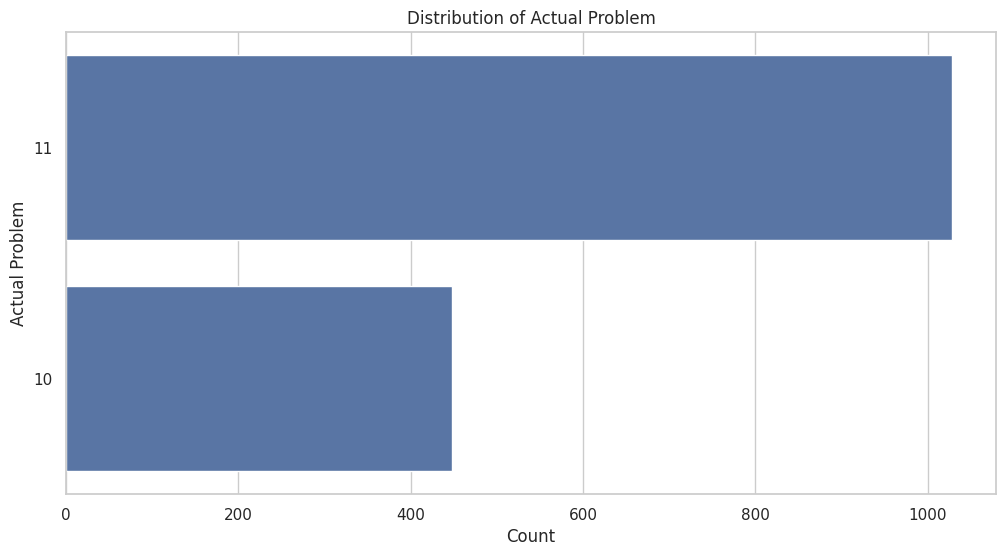

Actual Problem distribution (in %):
Actual problem
11    69.647696
10    30.352304
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(12, 6))
# Order the categories by frequency
order_prob = df['Actual problem'].value_counts().index
sns.countplot(y='Actual problem', data=df, order=order_prob)
plt.title("Distribution of Actual Problem")
plt.xlabel("Count")
plt.ylabel("Actual Problem")
plt.show()

# Print percentage distribution for 'Actual problem'
actual_prob_dist = df['Actual problem'].value_counts(normalize=True) * 100
print("Actual Problem distribution (in %):")
print(actual_prob_dist)


Summary statistics for SUVmax columns:


,Lesion SUVmax,Liver SUVmax,Bloodpool SUVmax
count,1476.000000,1476.000000,1476.000000
mean,3.458523,3.405169,2.406247
std,5.448015,0.626193,0.462108
min,0.000000,1.710000,0.870000
25%,0.000000,2.957500,2.090000
50%,1.490000,3.380000,2.360000
75%,4.507500,3.802500,2.690000
max,46.510000,6.070000,3.920000


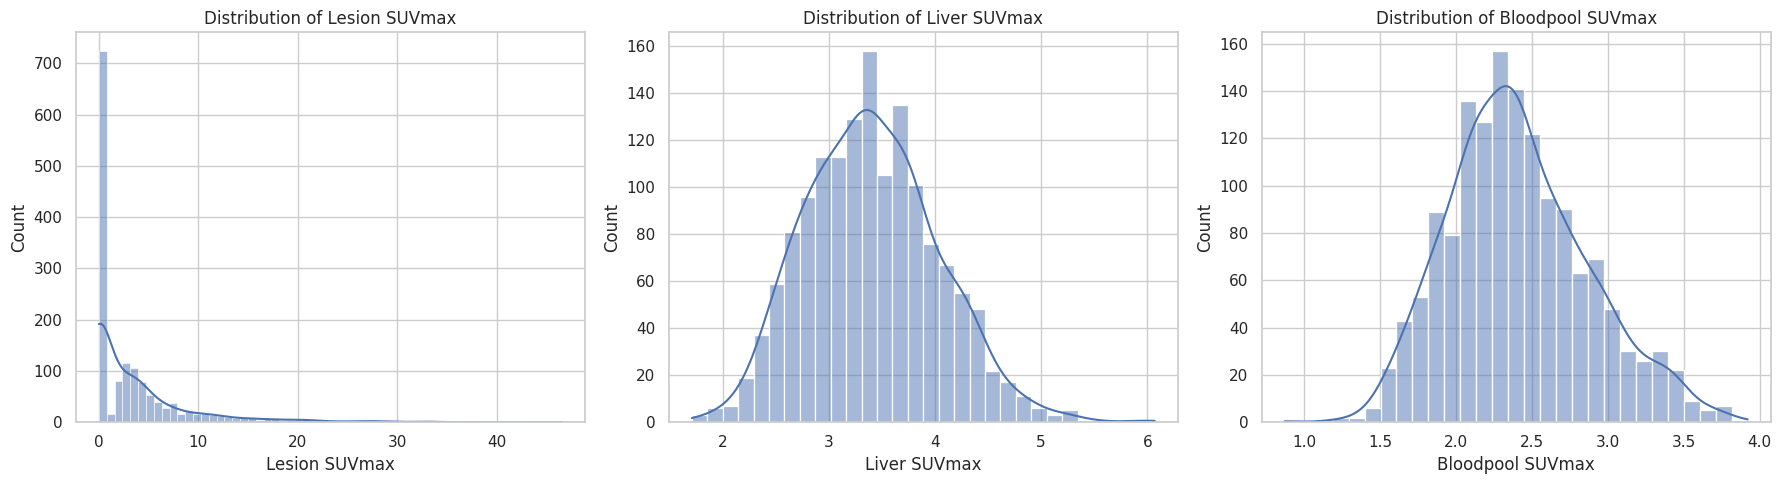

In [10]:
# --- Histogram of SUVmax columns ---

import matplotlib.pyplot as plt
import seaborn as sns

# List of the SUVmax columns you want to analyze
suvmax_cols = ["Lesion SUVmax", "Liver SUVmax", "Bloodpool SUVmax"]

# Print summary statistics for these columns
print("Summary statistics for SUVmax columns:")
display(df[suvmax_cols].describe())

# Create histograms for each SUVmax column
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, suvmax_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [11]:
# Convert 'Age Exam' column to numeric (if not already)
df['Age Exam'] = pd.to_numeric(df['Age Exam'], errors='coerce')

# Drop rows with missing or invalid age (if desired)
df = df.dropna(subset=['Age Exam'])

# Quick summary stats for Age
print("Summary statistics for Age Exam:")
print(df['Age Exam'].describe())


Summary statistics for Age Exam:
count    1476.000000
mean       53.951220
std        18.357809
min        18.000000
25%        39.000000
50%        55.000000
75%        69.000000
max        92.000000
Name: Age Exam, dtype: float64


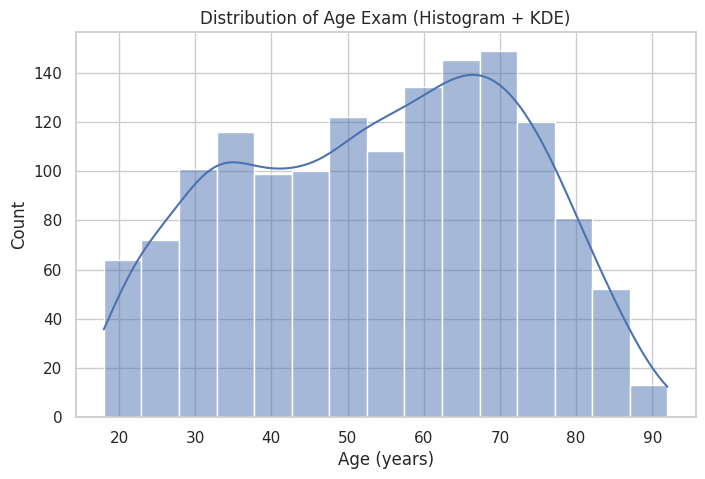

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age Exam', kde=True)
plt.title("Distribution of Age Exam (Histogram + KDE)")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()


Age Group Counts:
 AgeGroup
60-74    412
45-59    355
30-44    315
75+      221
<30      173
Name: count, dtype: int64

Age Group Percentage:
 AgeGroup
60-74    27.913279
45-59    24.051491
30-44    21.341463
75+      14.972900
<30      11.720867
Name: proportion, dtype: float64


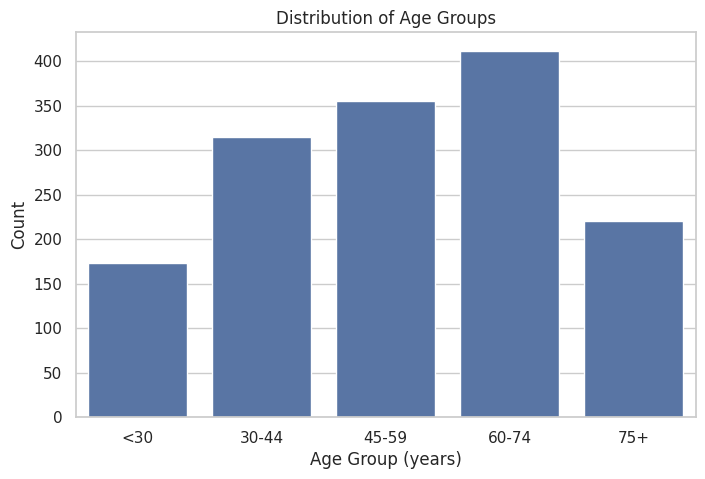

In [14]:
# Define bins for age groups (customize as needed)
# Example: <30, 30-44, 45-59, 60-74, 75+
bins = [0, 30, 45, 60, 75, 120]  # 120 as an upper bound
labels = ['<30', '30-44', '45-59', '60-74', '75+']

# Cut Age Exam into discrete bins
df['AgeGroup'] = pd.cut(df['Age Exam'], bins=bins, labels=labels, right=False)

# View distribution of the new 'AgeGroup' column
agegroup_counts = df['AgeGroup'].value_counts(dropna=False)
agegroup_perc = df['AgeGroup'].value_counts(normalize=True, dropna=False)*100

print("Age Group Counts:\n", agegroup_counts)
print("\nAge Group Percentage:\n", agegroup_perc)

# Bar plot of Age Group distribution
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', data=df, order=labels)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group (years)")
plt.ylabel("Count")
plt.show()
